In [4]:
import pandas as pd

In [9]:
merged_with_scans=pd.read_csv("scan_df.csv")

In [10]:
sex_count=merged_with_scans.groupby(["Sex","tumour_type"]).count().reset_index().sort_values(['tumour_type'], ascending=True)


In [16]:

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

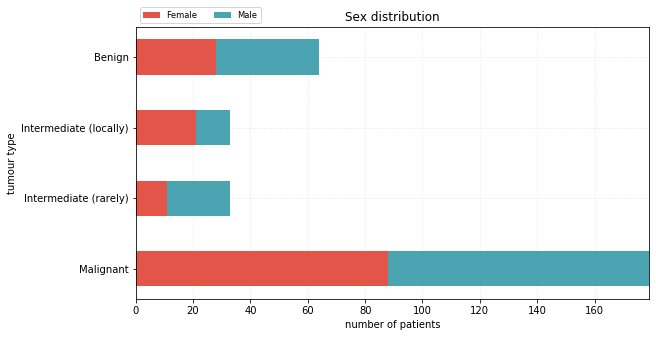

In [59]:
category_names=["Female","Male"]
labels = pd.unique(sex_count["tumour_type"]).tolist()

x = np.arange(0, len(sex_count.index))

category_colors = plt.get_cmap('Spectral')(np.linspace(0.15, 0.85, len(category_names)))
data = sex_count["Age"].values.tolist()
data=np.reshape(data, (4, 2))
data_cum = np.cumsum(data, axis=1,dtype=float)

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()

ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)   
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
       
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

ax.set_title('Sex distribution',loc ='center')
plt.xlabel("number of patients")
plt.ylabel("tumour type")
plt.savefig("sex-tumour_type.png")
plt.show()


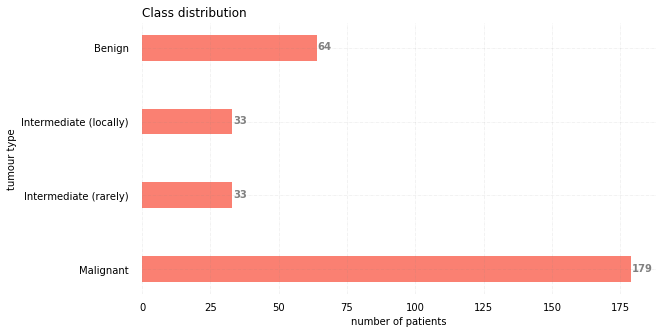

In [61]:
grouped_data = merged_with_scans.groupby(["tumour_type"]).count().reset_index().sort_values(['tumour_type'], ascending=True)

name = grouped_data['tumour_type']
price = grouped_data['Patient']
 
fig, ax = plt.subplots(figsize=(9.2, 5))
 
ax.barh(name, price,height=0.35, color="salmon")
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

ax.set_title('Class distribution',loc ='left')
plt.xlabel("number of patients")
plt.ylabel("tumour type")
plt.savefig("class_dist.png")
plt.show()

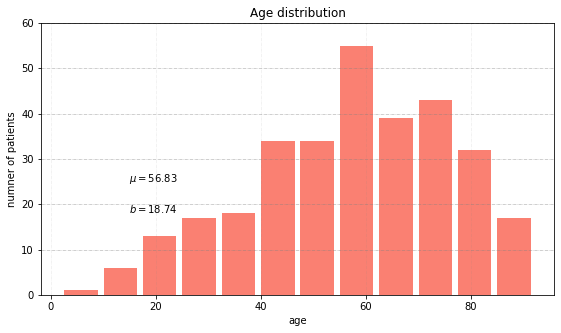

In [143]:
features=merged_with_scans["Age"].dropna().values
fig, ax = plt.subplots(figsize=(9.2, 5))
n, bins, patches = ax.hist(x=features, bins='auto',  color='salmon', rwidth=0.85)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.xlabel('age')
plt.ylabel('numner of patients')
plt.title('Age distribution')
plt.text(15, 25, r'$\mu={:.2f}$'.format(np.mean(features)))
plt.text(15, 18, r'$b={:.2f}$'.format(np.std(features)))
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig("age.png")
plt.grid(axis='y', alpha=0.75)
plt.show()

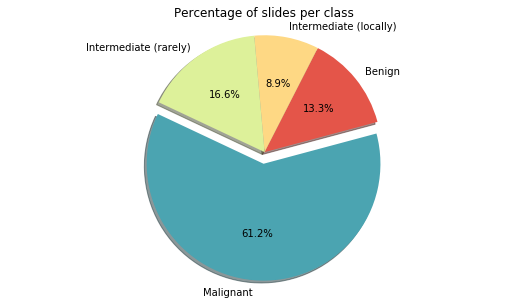

In [73]:
fig, ax = plt.subplots(figsize=(9.2, 5))

sum_df = merged_with_scans.groupby(['tumour_type']).agg({ 'number of scans': 'sum'})

data = sum_df['number of scans']
categories = sum_df.index.values.tolist()

category_colors = plt.get_cmap('Spectral')(np.linspace(0.15, 0.85, len(categories)))
my_explode = (0, 0,0 ,0.1)
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=15, shadow = True, colors=category_colors, explode=my_explode)
plt.title('Percentage of slides per class')
plt.axis('equal')
plt.savefig("pie.png")
plt.show()

In [85]:
age_per_class = merged_with_scans.loc[merged_with_scans["tumour_type"]=="Benign"]
features=age_per_class["Age"].dropna().values

In [140]:
def plot_histogram(features, filename,label):
    fig, ax = plt.subplots(figsize=(5, 5))
    n, bins, patches = ax.hist(x=features, bins='auto',  color='lightsteelblue', rwidth=0.85)
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    plt.xlabel('age')
    plt.ylabel('number of patients')
    plt.title('Age distribution {} class'.format(label.lower()))
    plt.text(20, 20, r'$\mu={:.2f}$'.format(np.mean(features)))
    plt.text(20, 17, r'$b={:.2f}$'.format(np.std(features)))
    maxfreq = n.max()
    plt.savefig(filename)
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

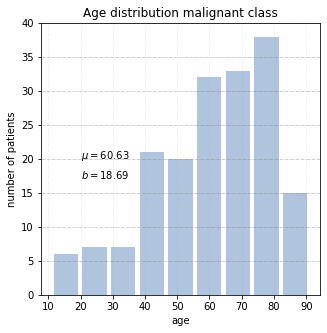

In [142]:
category="Malignant"
age_per_class = merged_with_scans.loc[merged_with_scans["tumour_type"]==category]
features=age_per_class["Age"].dropna().values
plot_histogram(features,"Malignant.png",category)

'Malignant'